In [8]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [9]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 76.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xB4CL8mIant14XpYAKLH")
project = rf.workspace("traffic-light-4a7sq").project("traffic-light-pu1o5-lknqx")
version = project.version(1)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to traffic-light-1 in yolov12:: 100%|██████████| 4106/4106 [00:00<00:00, 7457.23it/s]


In [11]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [12]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [13]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['green', 'red', 'yellow']

roboflow:
  workspace: traffic-light-4a7sq
test: ../test/images
train: ../train/images
val: ../valid/images


In [14]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=70)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.177 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/traffic-light-1/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, a

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 84.2MB/s]


AMP: checks passed ✅


train: Scanning /content/traffic-light-1/train/labels... 1423 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1423/1423 [00:00<00:00, 2520.05it/s]

train: New cache created: /content/traffic-light-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/traffic-light-1/valid/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 475.14it/s]

val: New cache created: /content/traffic-light-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      6.72G      3.556      4.952      4.143         30        640: 100%|██████████| 89/89 [00:49<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         50         62          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      6.81G      2.952      4.195      3.426         33        640: 100%|██████████| 89/89 [00:46<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         50         62      0.816     0.0972     0.0733      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      6.62G      2.672      3.481      2.965         35        640: 100%|██████████| 89/89 [00:47<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         50         62      0.727     0.0739     0.0509     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      6.62G      2.515       3.17      2.821         29        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         50         62      0.579      0.378      0.358      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      6.83G      2.475      2.947      2.702         35        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         50         62      0.807      0.323      0.464      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      6.65G      2.365      2.603      2.573         39        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         50         62      0.437      0.574      0.524      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70       6.8G      2.283      2.482      2.508         38        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         50         62      0.871       0.63      0.797      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      6.64G       2.15       2.26       2.38         33        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         50         62      0.816      0.665      0.789      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      6.83G      2.134      2.208      2.327         35        640: 100%|██████████| 89/89 [00:47<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         50         62      0.949      0.651      0.811      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      6.65G      2.075      2.091      2.284         34        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         50         62      0.735      0.707      0.778        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      6.65G      2.009      1.968      2.231         35        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         62      0.894       0.72      0.881      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      6.62G      1.957      1.893       2.15         31        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         50         62      0.945      0.701      0.858      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      6.65G      1.906      1.792      2.115         41        640: 100%|██████████| 89/89 [00:47<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         50         62      0.827      0.903        0.9      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      6.79G      1.843      1.743       2.04         31        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         50         62      0.972      0.842      0.927      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      6.81G      1.845      1.719      2.043         38        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         50         62      0.935      0.867      0.934      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      6.63G      1.805      1.682      1.997         31        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         50         62      0.944      0.863      0.939      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      6.83G      1.766      1.644      1.975         34        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         50         62       0.83      0.698      0.755      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      6.81G      1.747      1.572      1.959         27        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         50         62      0.879      0.873      0.916      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      6.81G      1.718      1.572      1.916         35        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         50         62      0.883      0.701      0.882      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      6.62G      1.719       1.53        1.9         47        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         50         62      0.909      0.872      0.903      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      6.65G      1.715      1.508      1.915         32        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         50         62        0.8      0.862      0.918      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      6.81G      1.654      1.493      1.858         35        640: 100%|██████████| 89/89 [00:47<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         50         62      0.883      0.856      0.924      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      6.81G      1.673      1.446       1.85         31        640: 100%|██████████| 89/89 [00:48<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         50         62      0.882      0.834      0.895      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      6.63G       1.66      1.464      1.865         37        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         50         62       0.89      0.956      0.939      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      6.83G      1.597      1.397      1.806         44        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         50         62      0.869      0.944       0.95       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      6.82G      1.614      1.387      1.791         30        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         50         62      0.897      0.939      0.963      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      6.63G      1.617      1.396      1.818         24        640: 100%|██████████| 89/89 [00:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         50         62      0.889      0.924      0.923       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      6.64G      1.572      1.356      1.779         28        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         50         62      0.859       0.92      0.921      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      6.81G      1.598      1.351      1.778         25        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         50         62       0.98      0.858      0.958      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      6.81G      1.551      1.323      1.744         37        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         62      0.919      0.927      0.944      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      6.81G      1.536      1.259      1.722         28        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         50         62      0.919      0.924      0.955      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      6.62G      1.576      1.304      1.748         34        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         50         62       0.94      0.902      0.978      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      6.82G      1.515      1.284      1.735         34        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         50         62      0.865      0.965      0.923      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      6.81G      1.525      1.262      1.734         29        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         62      0.904      0.918      0.923      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      6.81G      1.525      1.254       1.71         35        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         50         62      0.885      0.896      0.945      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      6.63G      1.524      1.245      1.713         26        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         50         62      0.921      0.949      0.974      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      6.83G      1.517      1.238      1.719         26        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         50         62       0.96      0.941      0.988      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      6.82G      1.492      1.201      1.697         21        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         50         62      0.905       0.95      0.985      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      6.63G      1.465      1.153      1.671         27        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         50         62      0.948      0.938      0.983       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      6.64G       1.48      1.207      1.674         31        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         50         62        0.9      0.957      0.969      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      6.82G      1.495      1.186      1.668         31        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         50         62      0.935      0.974      0.974      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      6.81G      1.456      1.176       1.65         37        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         50         62      0.923      0.975      0.941      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      6.81G      1.455      1.152      1.648         35        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         50         62       0.91      0.968      0.976      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      6.62G      1.449       1.15      1.633         36        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         62      0.889      0.969      0.969       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      6.81G      1.446      1.146      1.652         26        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         50         62      0.974      0.952      0.985      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      6.81G      1.445      1.152      1.659         32        640: 100%|██████████| 89/89 [00:48<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         50         62      0.968      0.969      0.984      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      6.65G      1.445       1.12       1.65         27        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         50         62      0.939      0.969      0.982      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      6.62G      1.404      1.102      1.606         37        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         50         62      0.915      0.951      0.944      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      6.81G      1.406      1.095      1.617         30        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         62       0.93      0.969      0.979      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      6.81G      1.402      1.092      1.608         26        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         50         62      0.941      0.903      0.965      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      6.81G      1.384      1.078      1.584         34        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         50         62      0.925      0.957      0.967      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      6.63G      1.369      1.073      1.581         34        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         50         62      0.912      0.946      0.979      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      6.83G      1.384      1.084      1.615         31        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         62       0.94      0.957      0.976      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      6.64G      1.404      1.081      1.604         24        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         50         62      0.915      0.908      0.946      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70       6.8G      1.365      1.068      1.579         36        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         50         62      0.915      0.959      0.977      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      6.64G      1.373      1.029      1.585         28        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         50         62      0.929      0.972       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      6.83G      1.388      1.057      1.601         29        640: 100%|██████████| 89/89 [00:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         50         62      0.945      0.971      0.977      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      6.64G      1.341      1.033      1.572         27        640: 100%|██████████| 89/89 [00:46<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         50         62      0.925      0.977      0.962       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70       6.8G      1.355      1.046      1.576         27        640: 100%|██████████| 89/89 [00:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         50         62      0.943      0.959      0.974      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      6.64G      1.325      1.012      1.549         41        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         50         62      0.928       0.95      0.987      0.764


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      6.65G      1.261     0.8413      1.519         18        640: 100%|██████████| 89/89 [00:47<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         50         62      0.964      0.913      0.969      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      6.82G       1.23     0.8117      1.507         16        640: 100%|██████████| 89/89 [00:46<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         62      0.891      0.974      0.969      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      6.81G      1.217     0.7915      1.492         22        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         62      0.916      0.972      0.974      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      6.63G      1.194     0.7862      1.476         19        640: 100%|██████████| 89/89 [00:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         50         62      0.897      0.973      0.974      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      6.83G      1.206      0.784      1.475         19        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         50         62       0.92      0.972      0.977      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      6.82G      1.203     0.7671      1.478         17        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         50         62      0.917      0.972      0.977       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      6.64G      1.182     0.7624      1.472         17        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         50         62      0.914      0.959      0.972      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      6.64G      1.175     0.7555       1.45         18        640: 100%|██████████| 89/89 [00:46<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         50         62      0.933      0.976      0.978      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      6.82G       1.18     0.7615       1.47         20        640: 100%|██████████| 89/89 [00:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         50         62       0.93      0.969      0.978      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      6.82G      1.151     0.7412      1.447         19        640: 100%|██████████| 89/89 [00:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         50         62      0.934      0.969      0.978      0.781



70 epochs completed in 0.959 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,075,369 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         50         62       0.93      0.969      0.978      0.788
                 green         24         32      0.949      0.906      0.966      0.732
                   red         20         24      0.984          1      0.995      0.777
                yellow          6          6      0.856          1      0.972      0.857
Speed: 0.3ms preprocess, 9.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [15]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix_normalized.png			    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1754911158.00aff9955ec5.1474.0  train_batch5340.jpg
F1_curve.png					    train_batch5341.jpg
labels_correlogram.jpg				    train_batch5342.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    weights
results.png


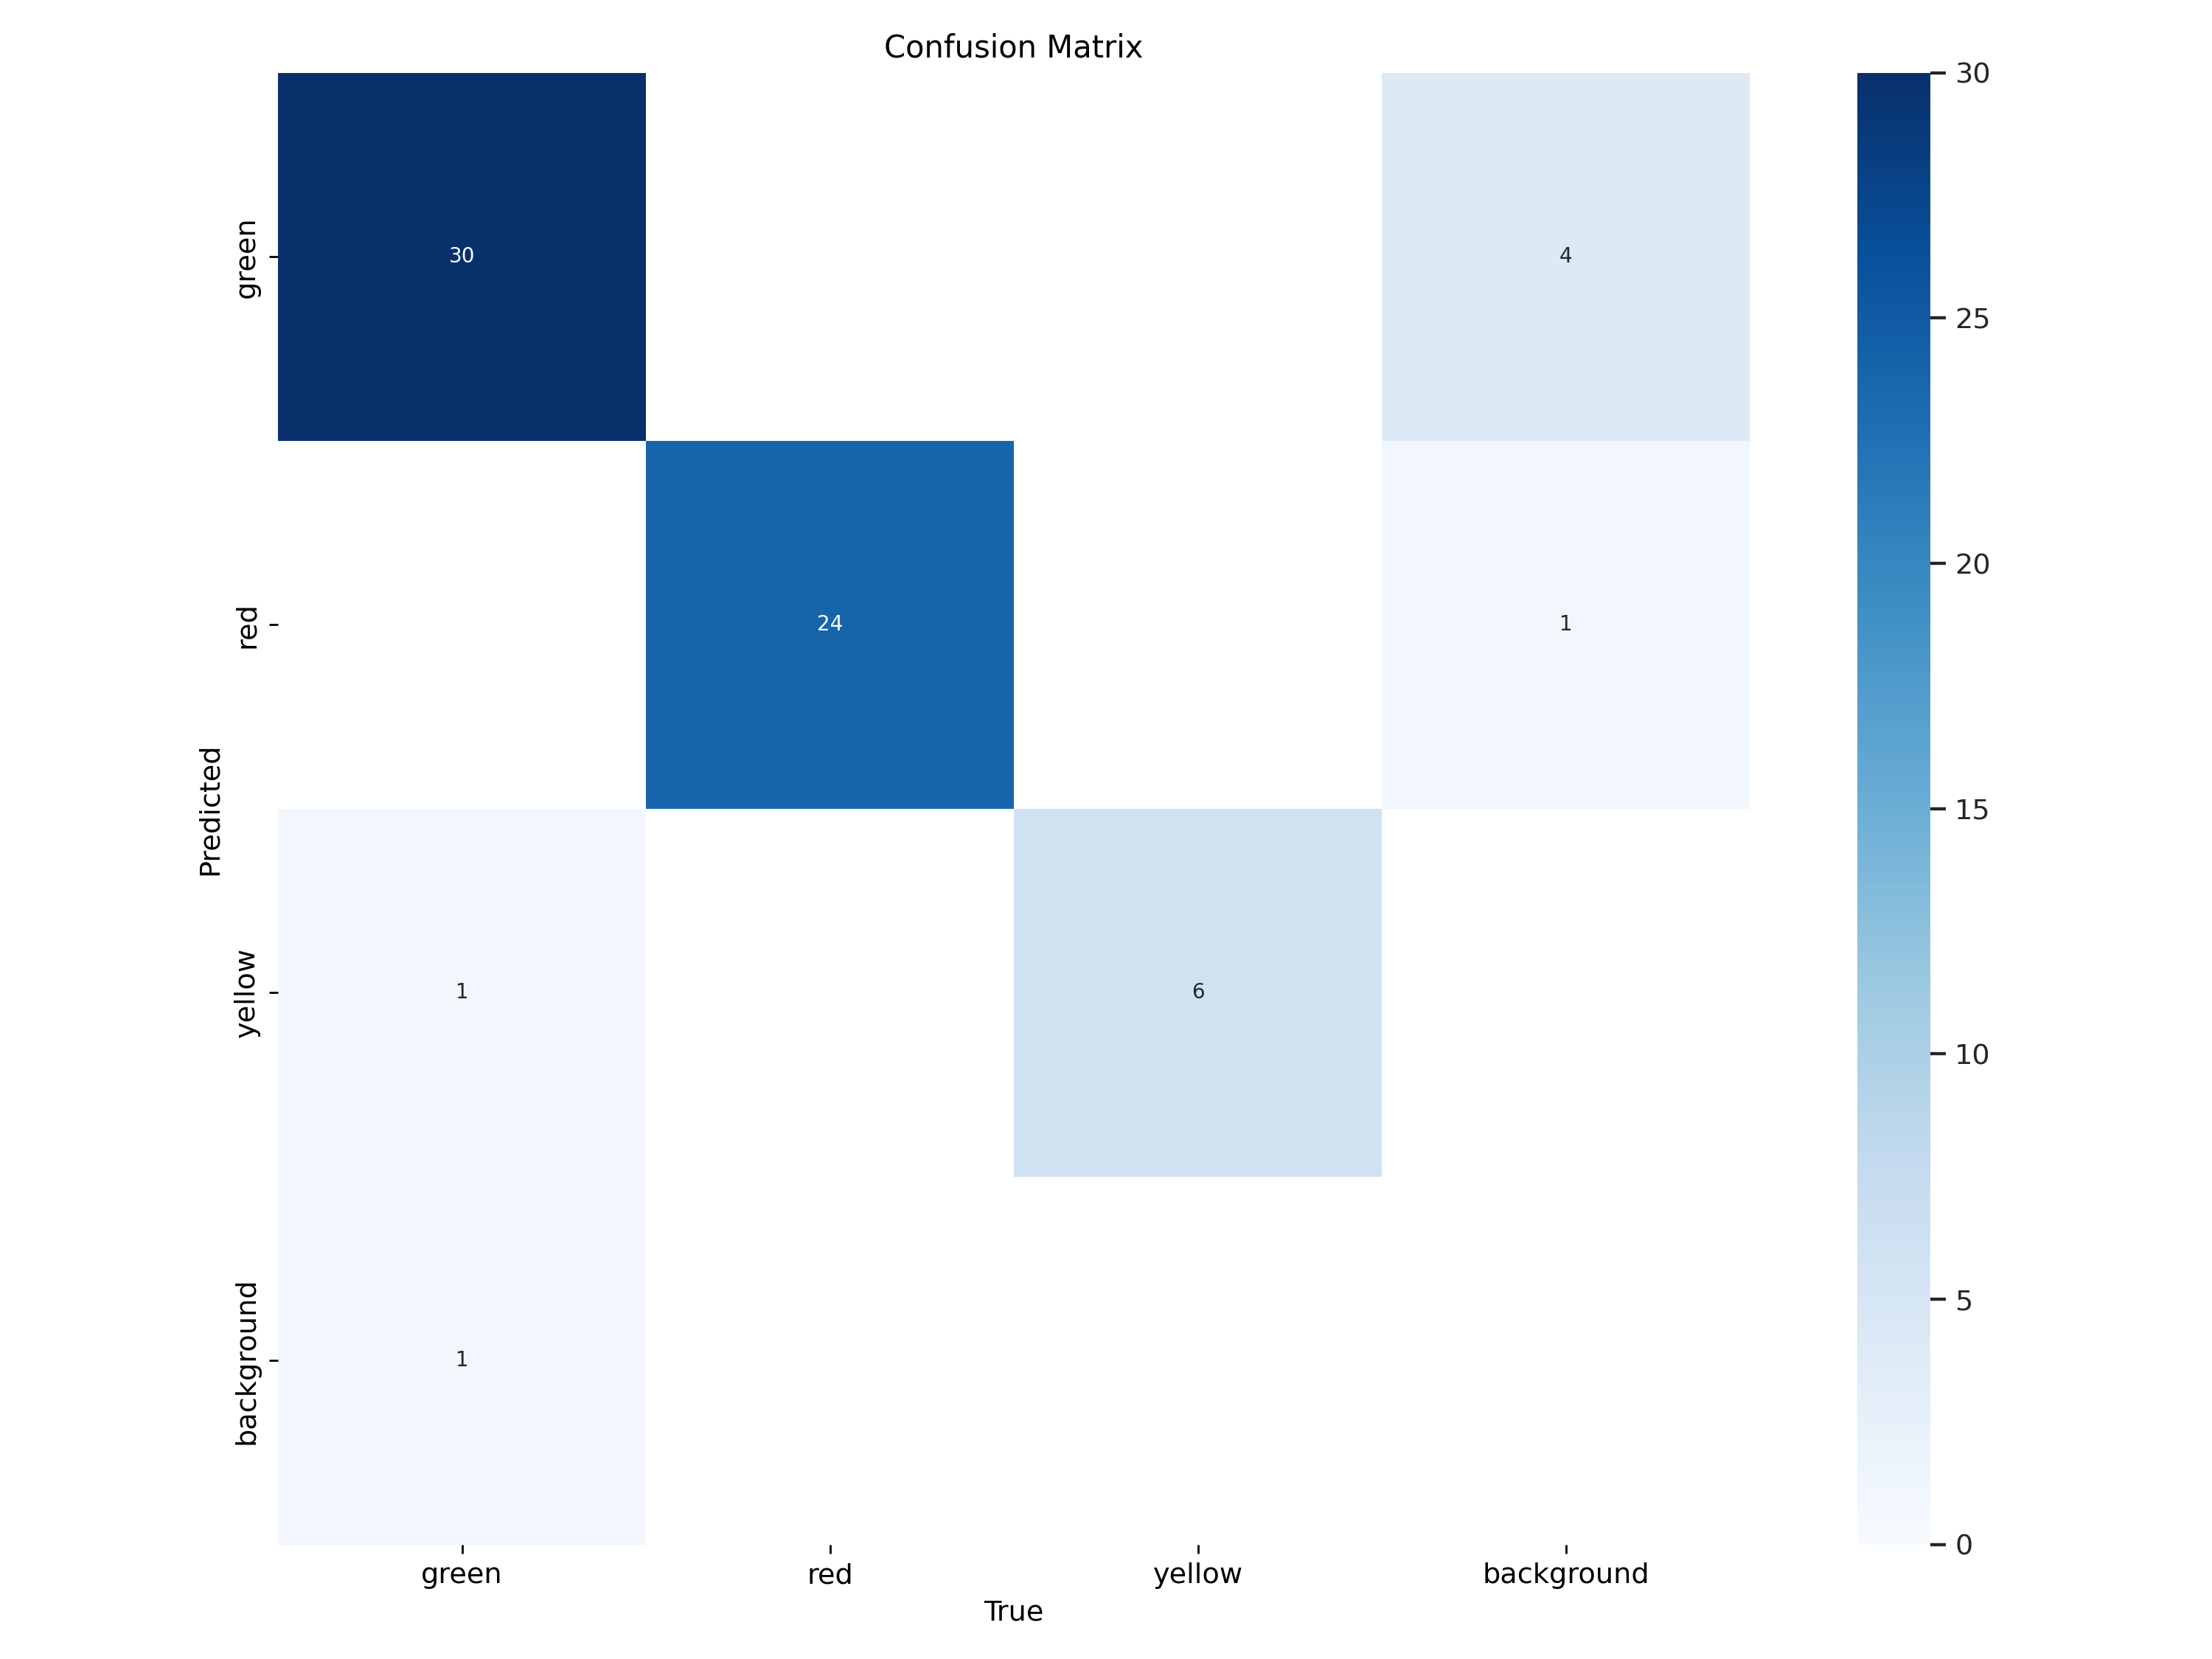

In [16]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

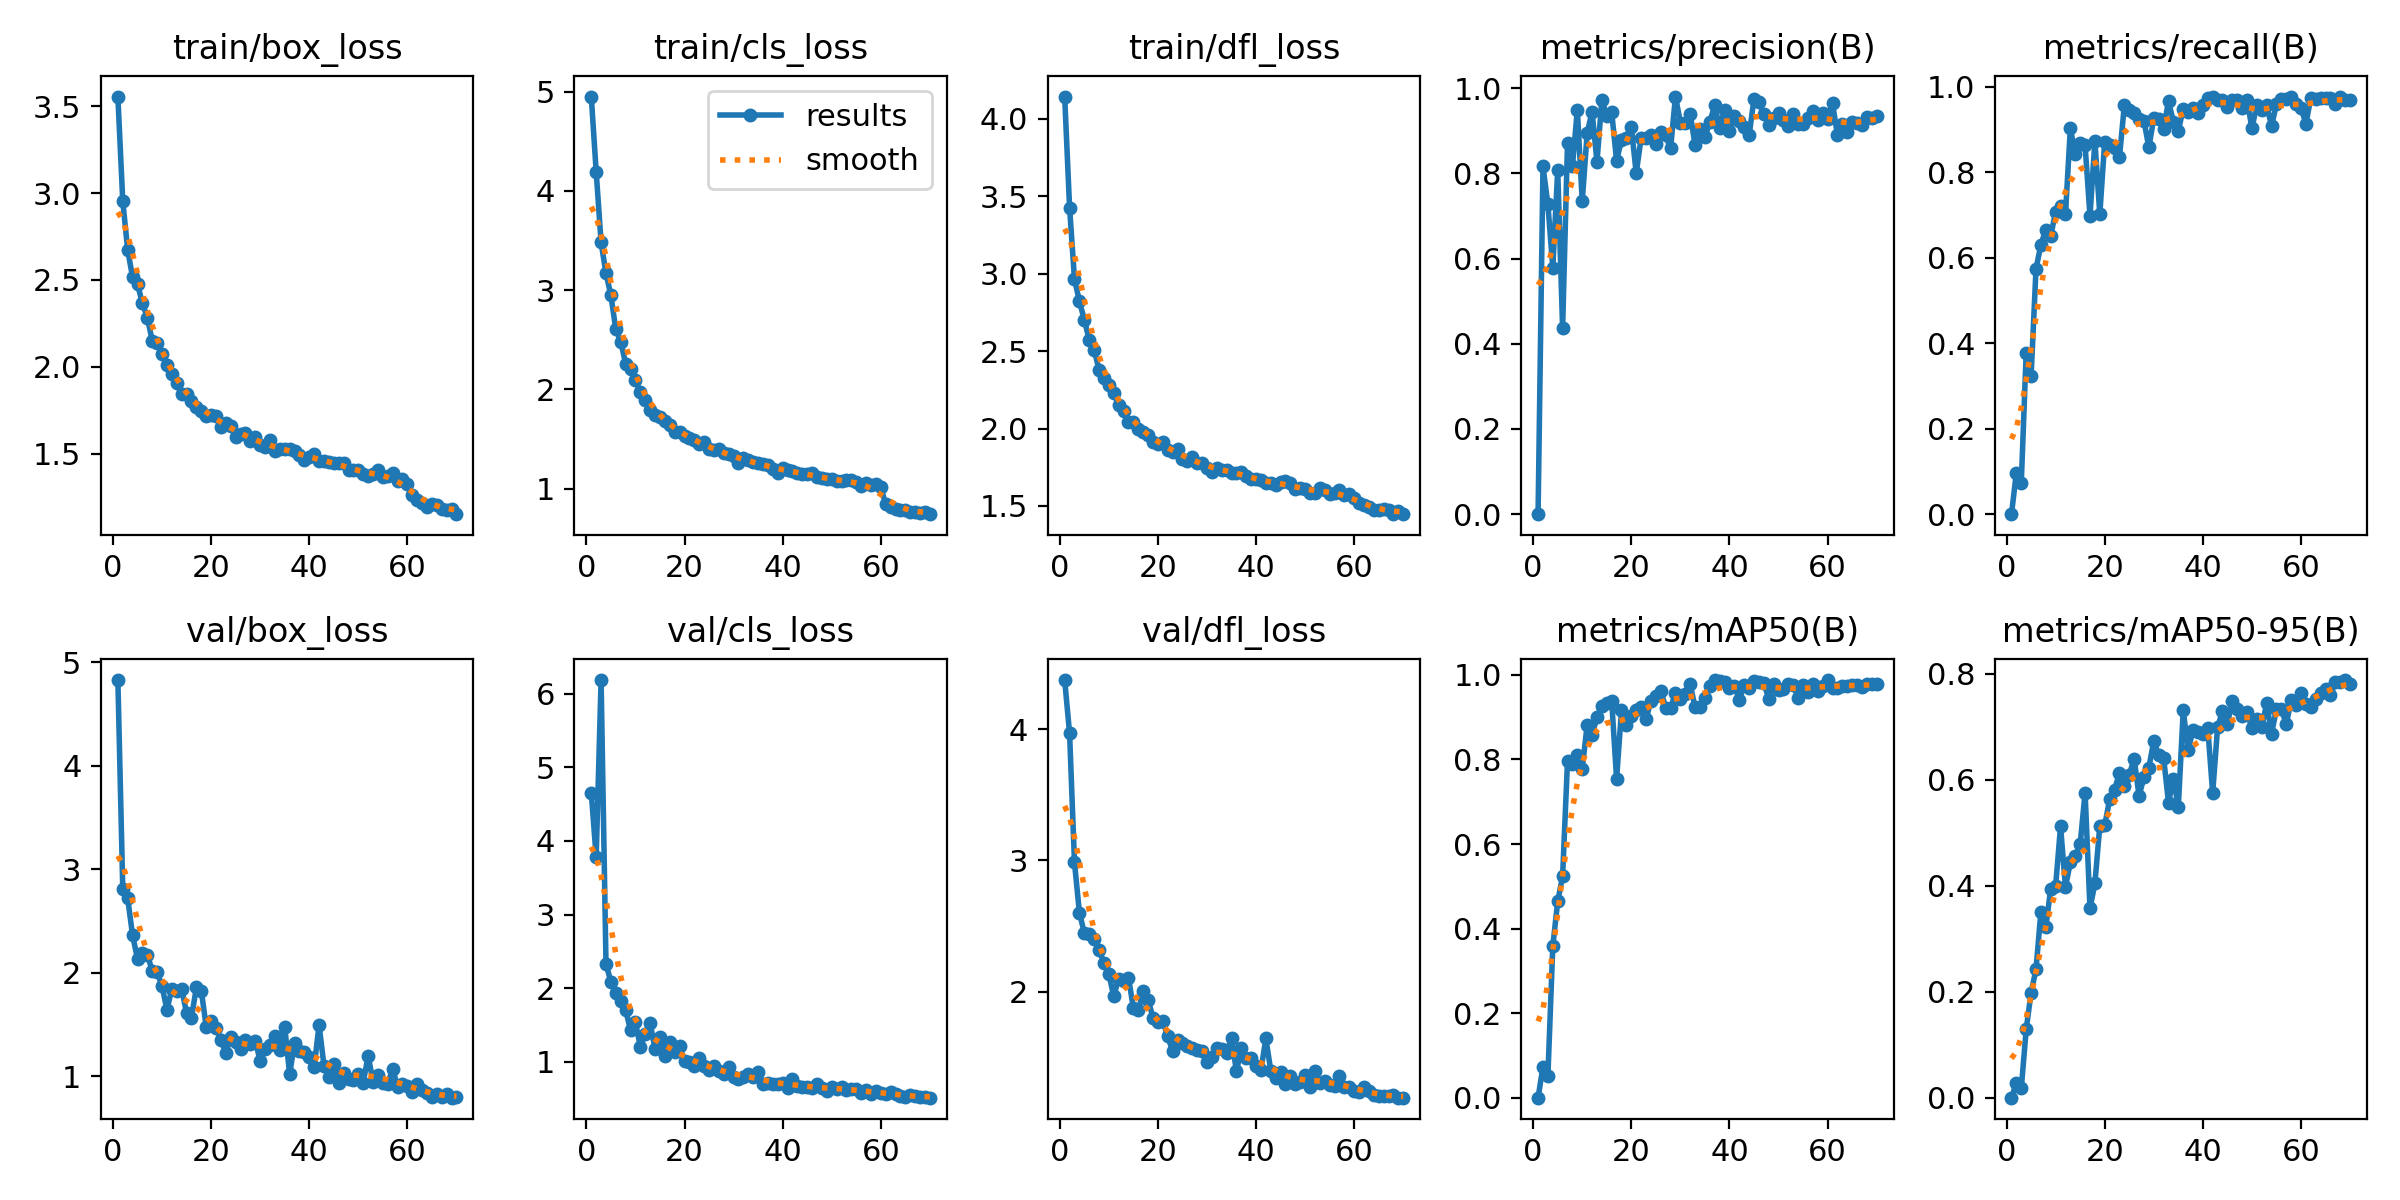

In [17]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [18]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['green', 'red', 'yellow']

In [19]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [20]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.5283555990221342
mAP 50 0.8301192970069062
mAP 75 0.5836345230124734


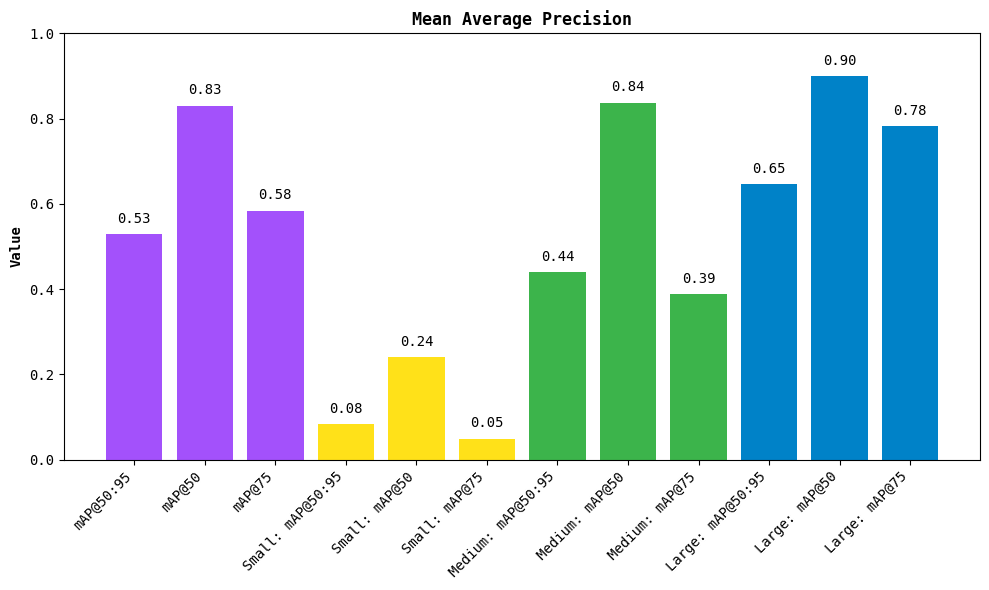

In [21]:
map.plot()

In [22]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

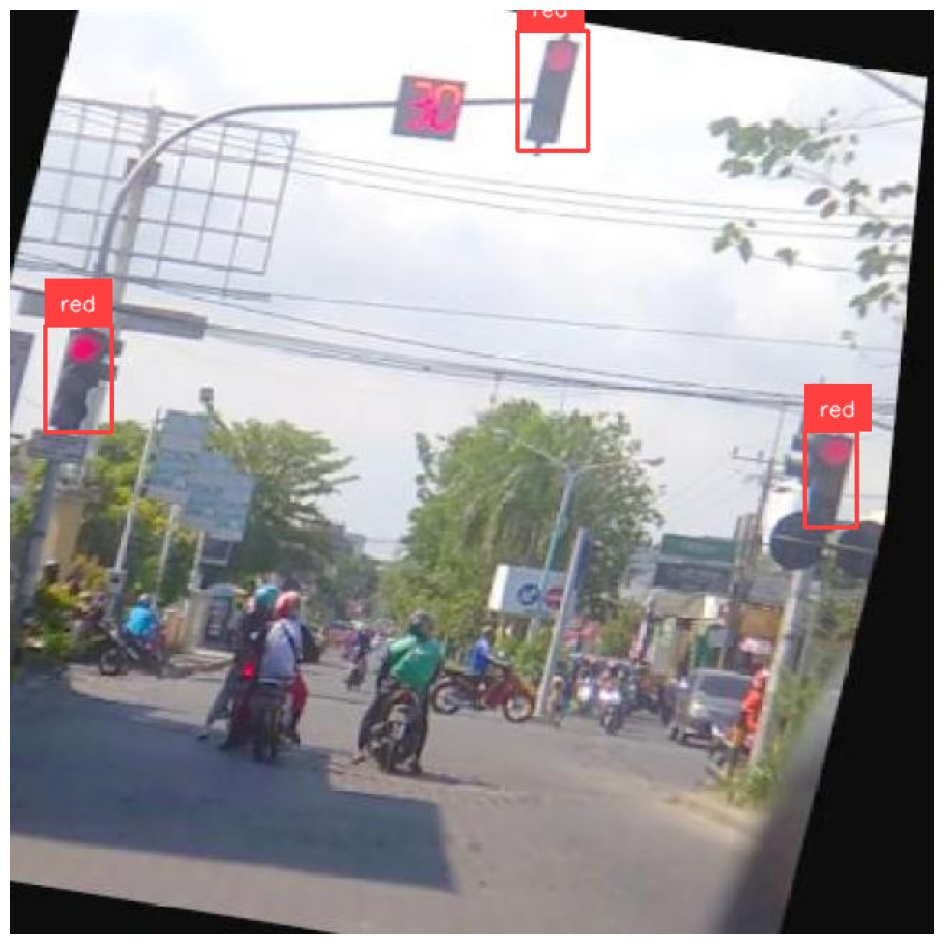

In [25]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [26]:
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/traffic-light-1/data.yaml

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,075,369 parameters, 0 gradients, 19.3 GFLOPs
val: Scanning /content/traffic-light-1/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.81it/s]
                   all         50         62      0.929      0.969      0.978      0.789
                 green         24         32      0.949      0.906      0.966      0.734
                   red         20         24      0.984          1      0.995      0.776
                yellow          6          6      0.855          1      0.972      0.857
Speed: 2.6ms preprocess, 28.0ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at htt

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/trafficlight.mp4" save=True

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,075,369 parameters, 0 gradients, 19.3 GFLOPs

video 1/1 (frame 1/1149) /content/trafficlight.mp4: 352x640 1 green, 59.2ms
video 1/1 (frame 2/1149) /content/trafficlight.mp4: 352x640 1 green, 16.3ms
video 1/1 (frame 3/1149) /content/trafficlight.mp4: 352x640 1 green, 14.9ms
video 1/1 (frame 4/1149) /content/trafficlight.mp4: 352x640 1 green, 16.1ms
video 1/1 (frame 5/1149) /content/trafficlight.mp4: 352x640 1 green, 14.7ms
video 1/1 (frame 6/1149) /content/trafficlight.mp4: 352x640 1 green, 14.8ms
video 1/1 (frame 7/1149) /content/trafficlight.mp4: 352x640 1 green, 18.4ms
video 1/1 (frame 8/1149) /content/trafficlight.mp4: 352x640 1 green, 14.7ms
video 1/1 (frame 9/1149) /content/trafficlight.mp4: 352x640 1 green, 14.5ms
video 1/1 (frame 10/1149) /content/trafficlight.mp4: 352